### Age

C2Score usage: many times

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        7476      245991      0.0100     73.3000    206.5600    462.8579    549.5900   5904.3900    676.7379 


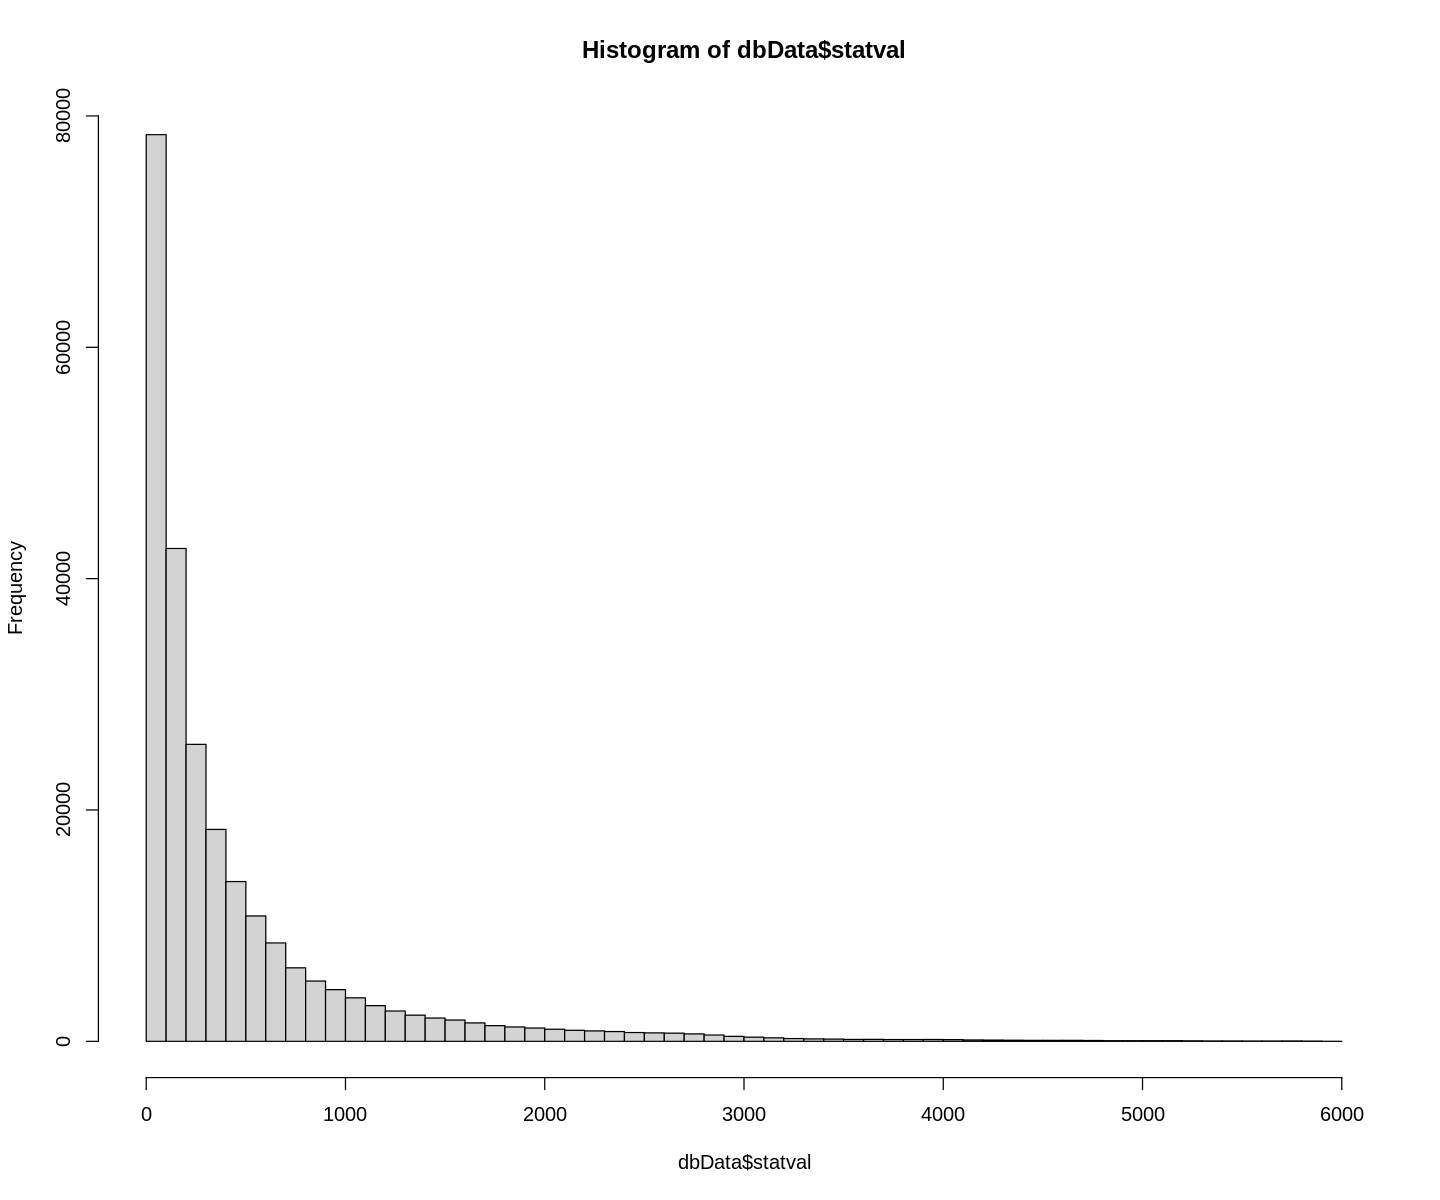

In [2]:
# What data we have.

dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='systemAgeDays' and statval > 0")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1941       79075      0.0100     84.5700    206.2400    428.0093    479.4100   5890.3900    650.1160 


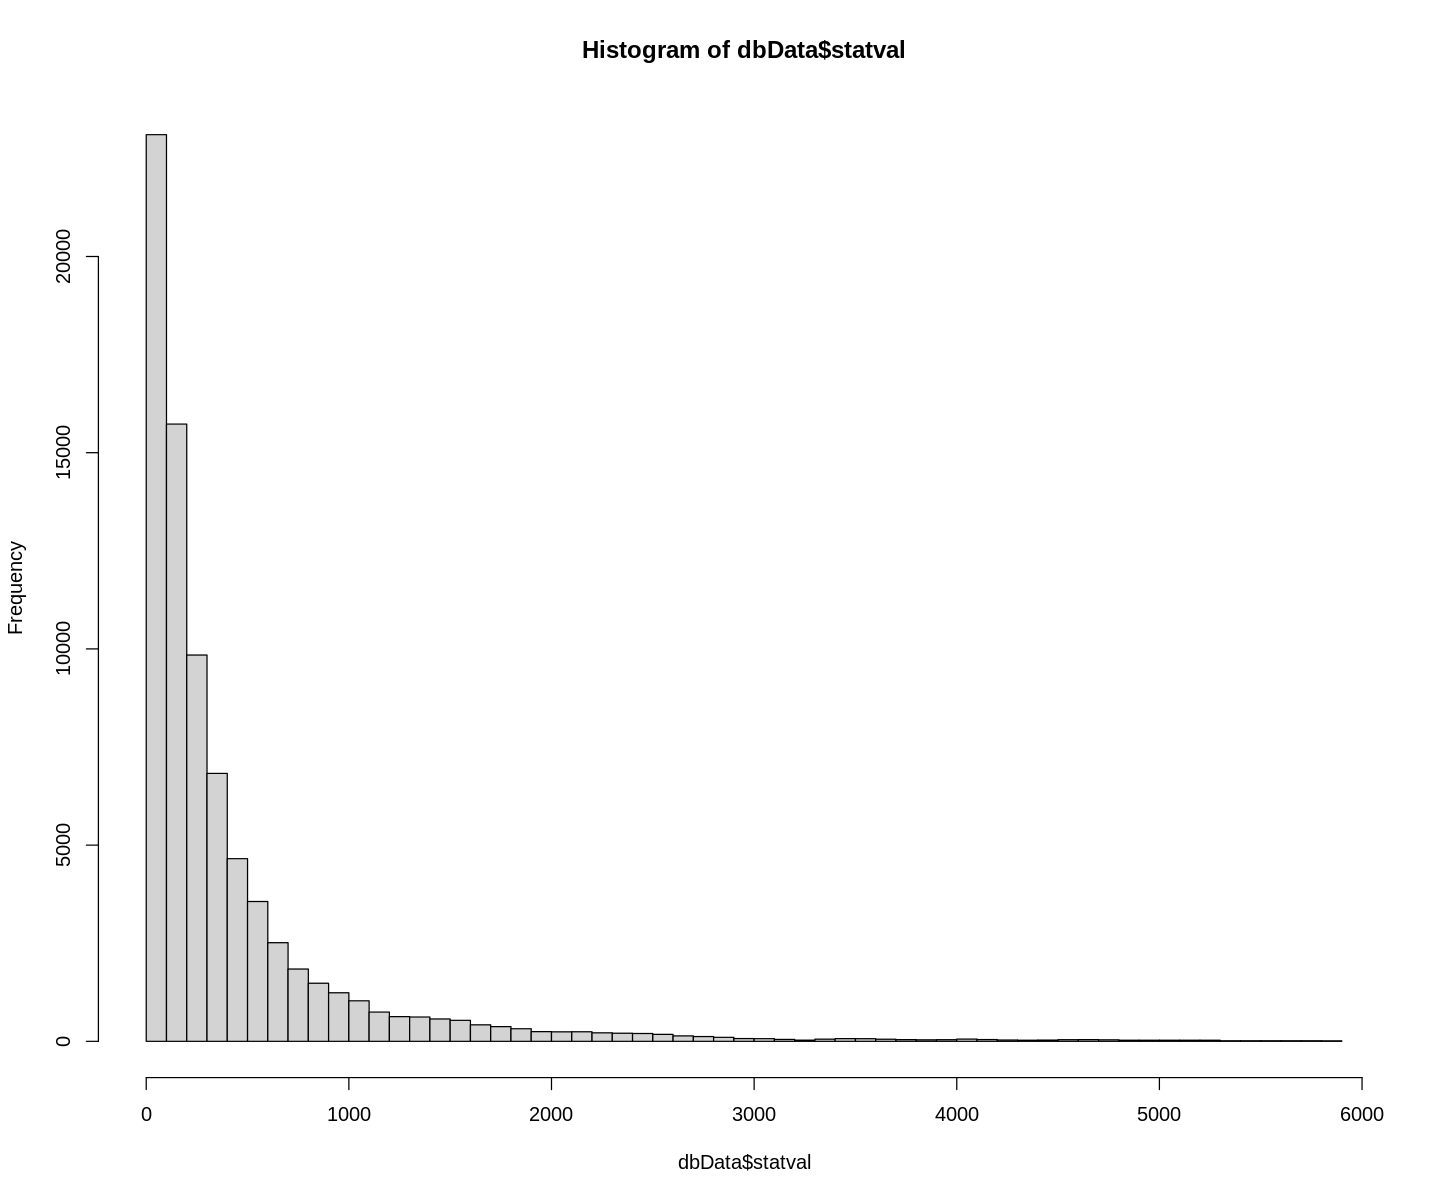

In [3]:
# Join it with our cleaned data
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='systemAgeDays' and statval > 0"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1941       79075      0.0100     84.5700    206.2400    428.0093    479.4100   5890.3900    650.1160 



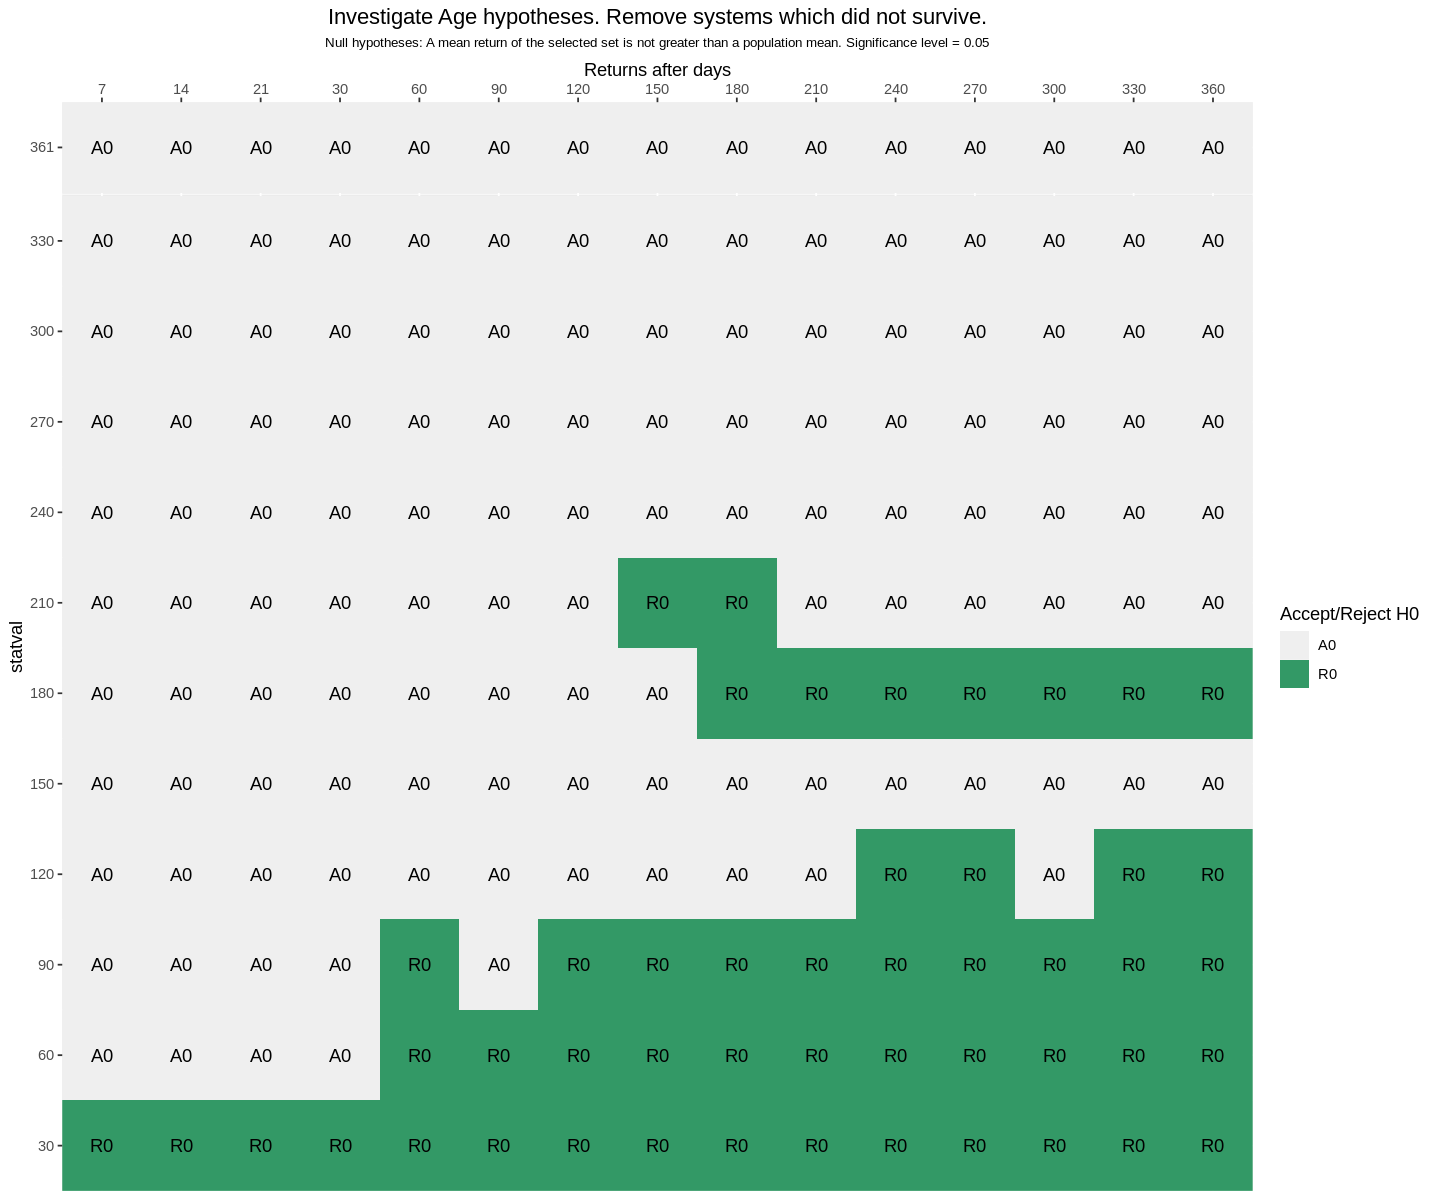

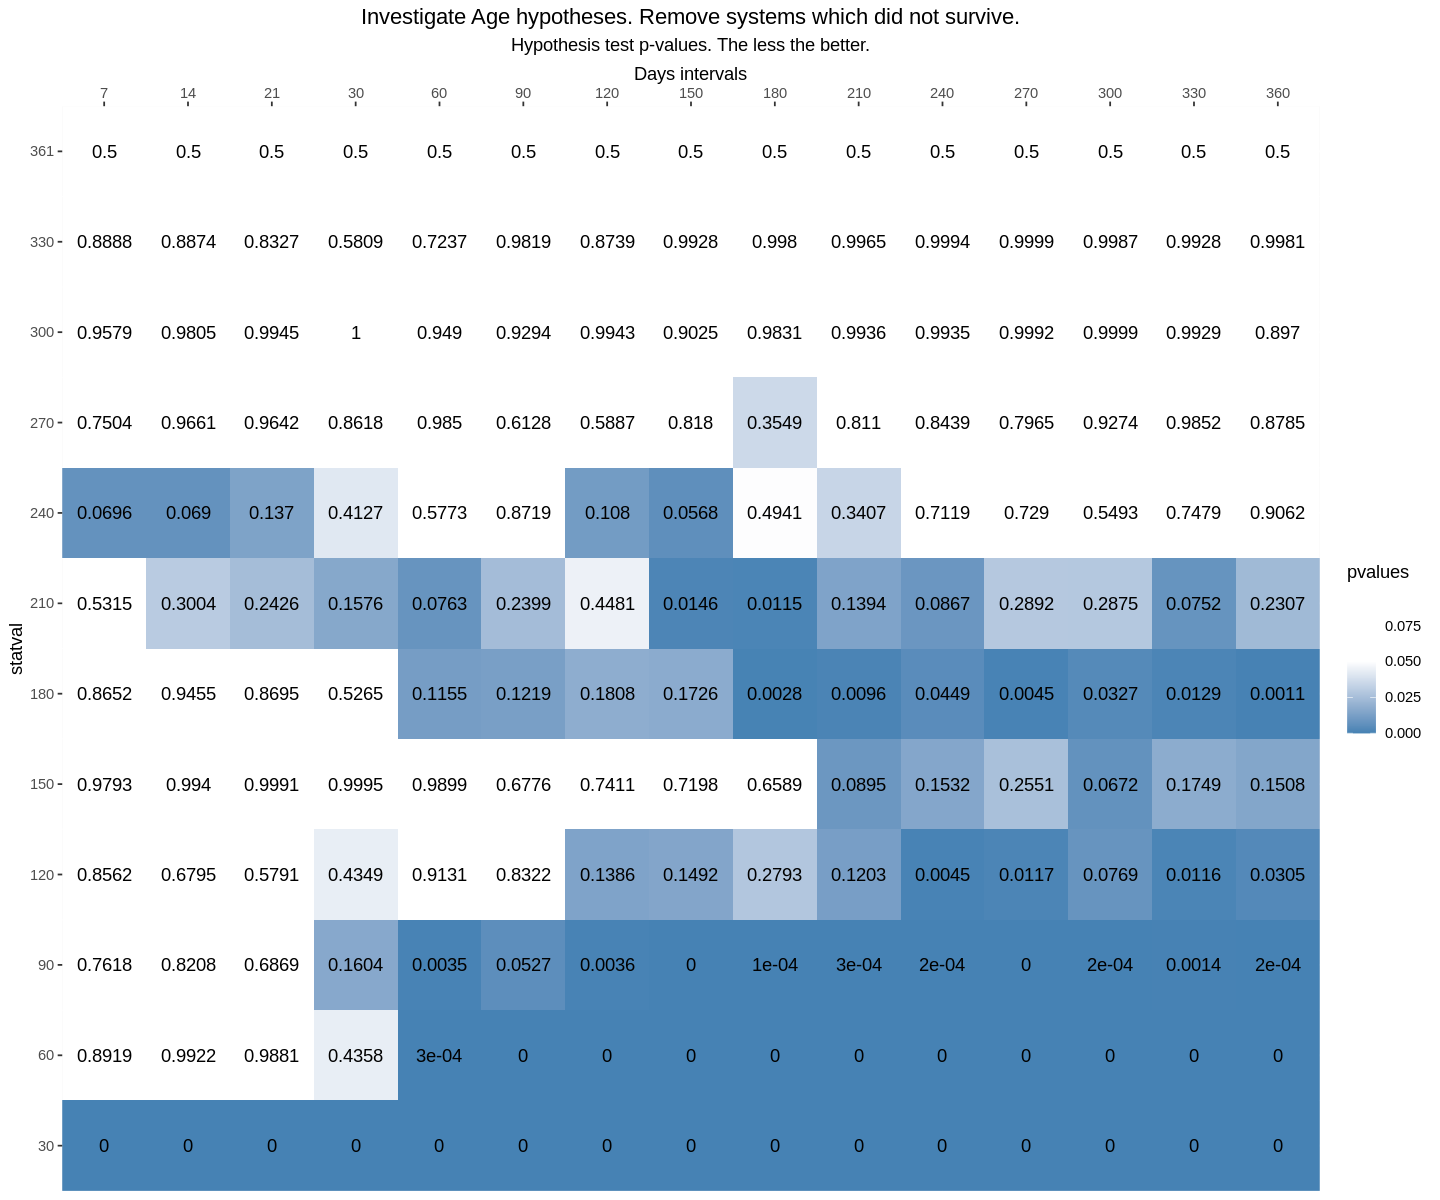

In [4]:
experiment = list(
  name = "Age",
  description = "Investigate Age hypotheses. Remove systems which did not survive.",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = c(30,60,90,120,150,180,210,240,270,300,330,361)) # add 1 to the 360 to be sure it is in results

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


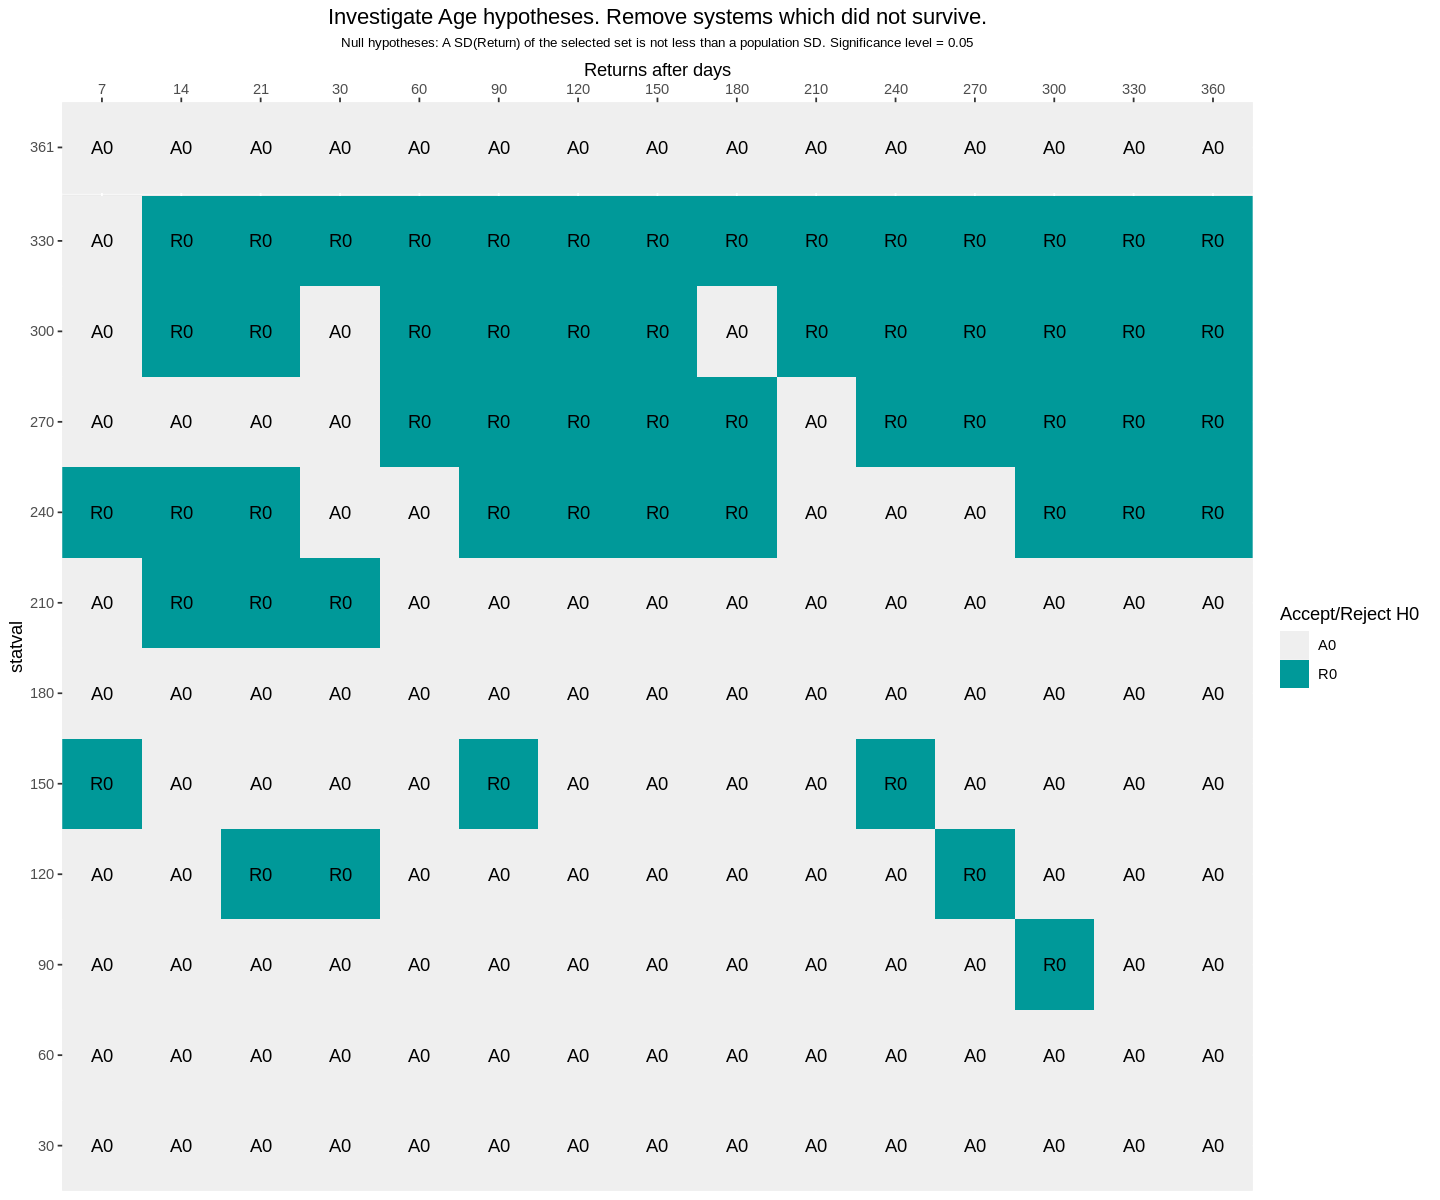

In [5]:
showSDLessHypothesisTest(experiment, result)

In [6]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
330 <= statval < 361,2077,2003,1928,1837,1581,1402,1247,1120,1025,915,796,686,611,528,485
300 <= statval < 330,2296,2240,2177,2092,1778,1530,1370,1221,1089,1011,900,785,669,599,514
270 <= statval < 300,2502,2435,2374,2302,2047,1738,1496,1334,1184,1067,983,881,757,652,582
240 <= statval < 270,2841,2757,2669,2555,2280,2021,1727,1483,1312,1171,1048,958,851,740,631
210 <= statval < 240,3011,2926,2850,2765,2410,2149,1912,1635,1397,1253,1109,996,914,810,703
180 <= statval < 210,3561,3448,3345,3209,2844,2448,2194,1947,1657,1429,1270,1129,1008,923,823
150 <= statval < 180,4014,3869,3733,3587,3114,2749,2386,2111,1858,1600,1368,1207,1065,950,870
120 <= statval < 150,4738,4502,4283,4019,3430,2976,2632,2279,2025,1795,1533,1310,1150,1014,898
90 <= statval < 120,5943,5654,5375,5022,4058,3425,2996,2650,2278,2040,1800,1528,1322,1174,1042



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



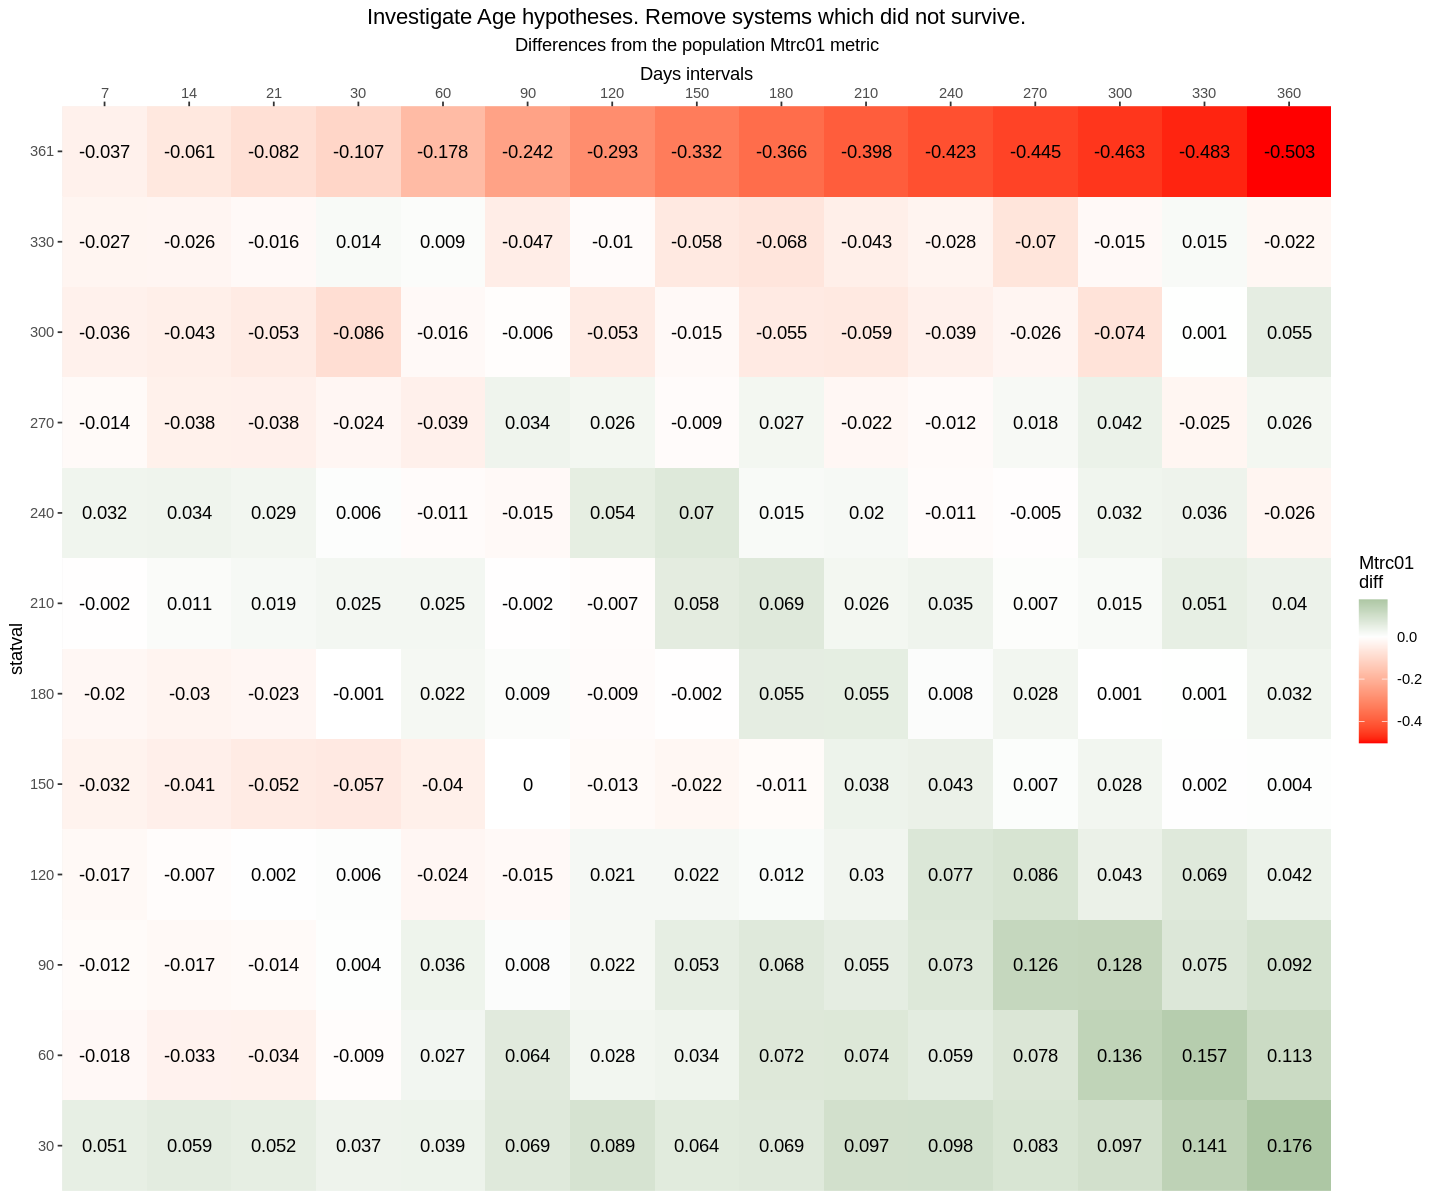

In [7]:
showMetricDifferences(experiment, result)

In [8]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
330 <= statval < 361,503,486,471,447,384,340,300,269,247,224,194,165,148,130,114
300 <= statval < 330,554,544,531,512,441,376,333,294,264,243,219,192,162,146,127
270 <= statval < 300,613,597,576,555,506,433,368,323,290,260,236,215,186,158,141
240 <= statval < 270,692,680,662,632,553,498,428,367,324,289,258,235,212,184,156
210 <= statval < 240,762,741,715,689,614,532,485,414,353,314,277,247,228,206,178
180 <= statval < 210,863,832,814,781,683,597,523,473,403,349,307,272,242,221,201
150 <= statval < 180,996,956,920,880,767,672,594,512,458,399,341,297,266,235,213
120 <= statval < 150,1218,1161,1113,1032,859,750,654,577,500,451,385,331,290,255,225
90 <= statval < 120,1494,1427,1366,1270,1027,840,740,643,562,491,444,375,327,286,251


### Discussion
 
Results are ambiguous. It is a question of how to interpret them. It seems that age as a __number__ doesn't mean too much in terms of future returns or volatility. 

However age is extremely important, because we need some time to obtain observations for statistics calculations.
See [Why age is so important](./C2Score_Doc_Math.ipynb).

High age can also mean that strategy behaves "sensibly". This may indicate that it can overcome difficult times in the market. (If such times occurred at all.) But we do know that some strategies are lucky for relatively long time in favorable circumstances...

Trader's experience (and Modern Portfolio Theory) says, that the key for long life is diversification. However it also means large accounts and relative low profits which is not a case of Collective2, where strategies with small accounts are trying to bring the highest possible profits in order to attract as many investors as possible.